<a href="https://colab.research.google.com/github/les1smore/Maryland_Statewide_Vehicle_Analysis_2020-2021/blob/main/2_EDA_Numeric%26Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. EDA

## 2.1 Numerical Data 

In [ ]:
# Once again, we load the numerical variables for reference
num_var

['ACC_DATE',
 'LATITUDE',
 'LONGITUDE',
 'AIRBAG_DEPLOYED',
 'YEAR',
 'VEH_YEAR',
 'SPEED_LIMIT',
 'age']

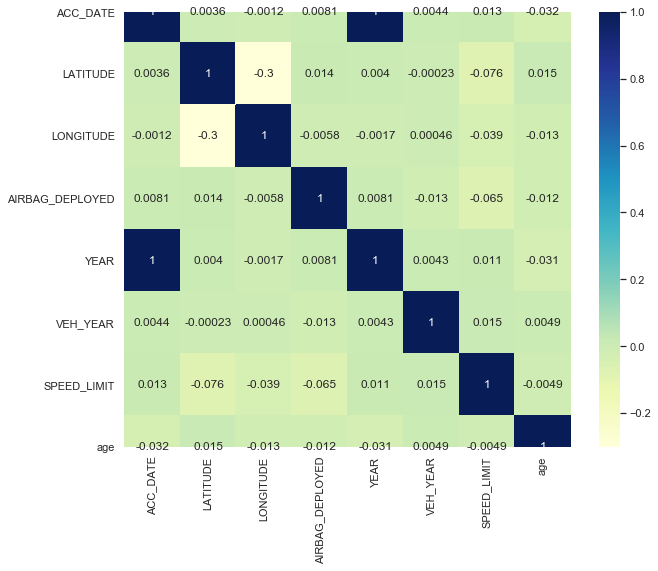

In [ ]:
# Take a look at the correlation among all variables
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(merged_data.corr(), annot = True, cmap = 'YlGnBu')

There seems no significant coorelation between numerical variables.

Acc_Date


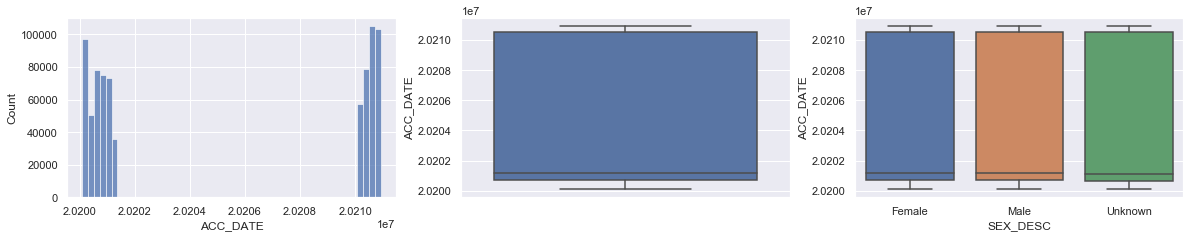

Latitude


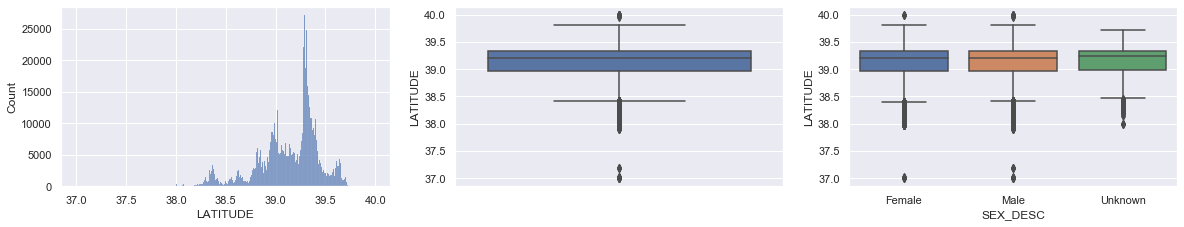

Longitude


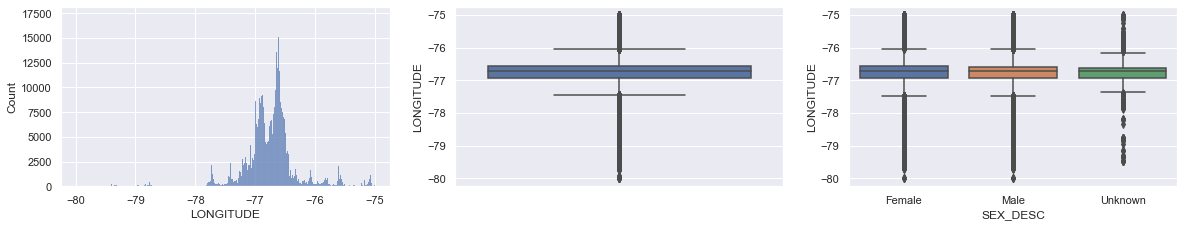

Airbag_Deployed


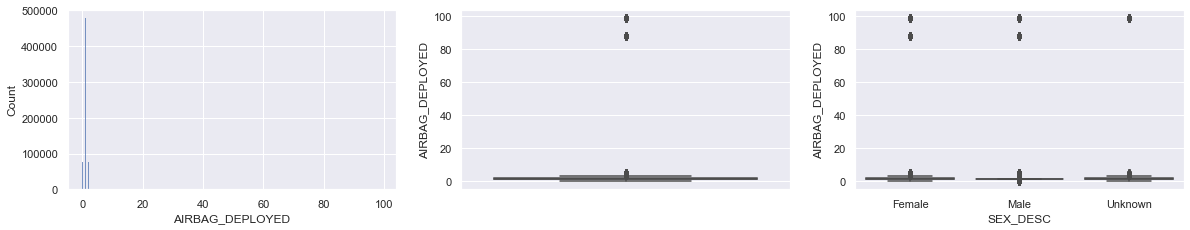

Year


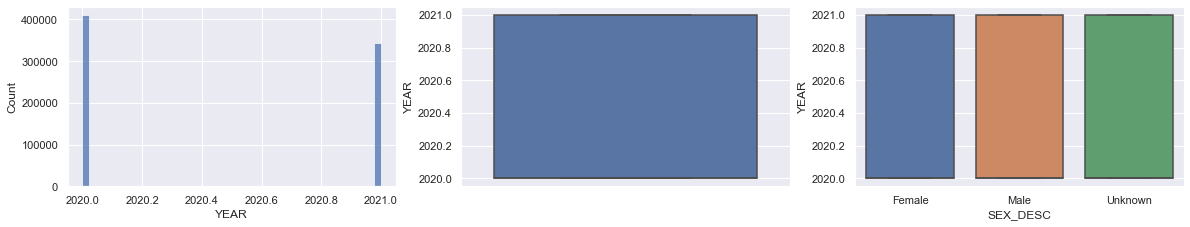

Veh_Year


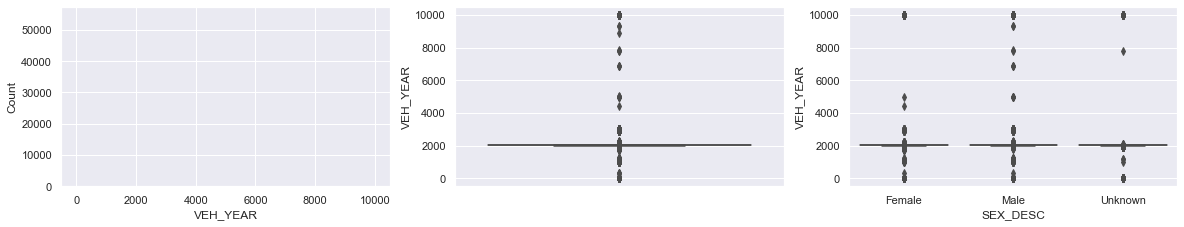

Speed_Limit


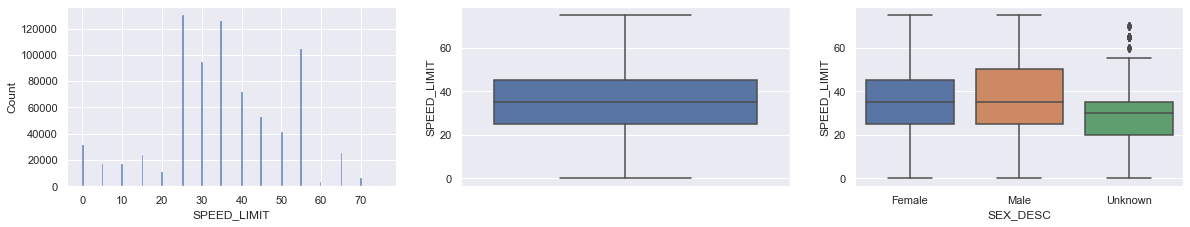

Age


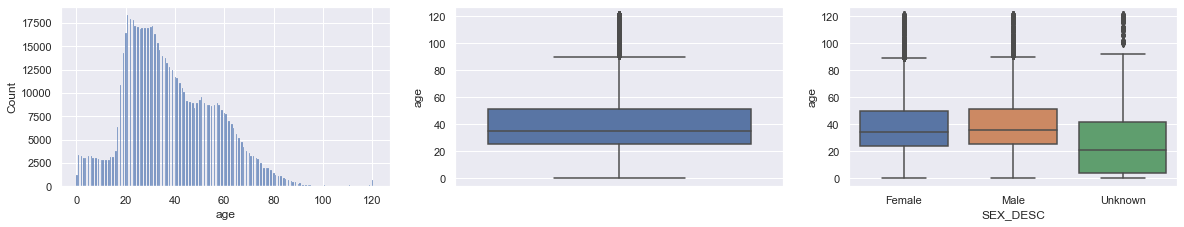

In [ ]:
# Visualize all numerical variables
sns.set(style='darkgrid')

i = 1
for column in num_var:
    print(column.title())
    plt.subplots(figsize = (20, 35))
    plt.subplot(len(num_var) + 1, 3, i)
    sns.histplot(x = merged_data[column])
    i += 1
    plt.subplot(len(num_var) + 1, 3, i)
    sns.boxplot(y = merged_data[column])
    i += 1
    plt.subplot(len(num_var) + 1, 3, i)
    sns.boxplot(x = merged_data['SEX_DESC'], y = merged_data[column])
    i += 1
    plt.show()

From the plots above, we can gain these insights below:
1. Among the accidents in 2020, there's a significant drop in the spring of 2020. Even if it has some fluctuations, the number of accidents are in average around 8,0000. As for those in 2021, the accident number is steadily increasing. However, accidents are more common in 2020 than 2021. 
2. The most three common speed limit values in this crash data are 25, 35, and 55. Intrestingly, though female drivers and male drivers share a similar speed limit median value, which is around 38, more male drivers tend to drive faster than female drivers in general. 
3. Among accidents in 2020-2021, the common age range for drivers is between 20-40, which indicating Gen Z and Millennials are subject to car crashes.

### 2.1.2 Time Series Anlysis in accidents ( week, hour, month, year)

In [ ]:
# Convert string to datetime object
crash['accident_date'] = pd.to_datetime(crash['ACC_DATE'], format='%Y%m%d')
crash['accident_year'] = crash['accident_date'].dt.strftime('%Y')
crash['accident_month'] = crash['accident_date'].dt.strftime('%m')
crash['accident_year_month'] = crash['accident_date'].dt.strftime('%Y-%m')

In [ ]:
# Get accidents count grouped by year and month
crashes_by_year_month = crash.groupby(['accident_year_month']).size()
crashes_by_year_month

accident_year_month
2020-01    8638
2020-02    8345
2020-03    7128
2020-04    4719
2020-05    6303
2020-06    7439
2020-07    8850
2020-08    8827
2020-09    8345
2020-10    9151
2020-11    8212
2020-12    8250
2021-01    7399
2021-02    7070
2021-03    8018
2021-04    8324
2021-05    9725
2021-06    9470
2021-07    9374
2021-08    9232
2021-09    8758
dtype: int64

In [ ]:
# Group accident data by three different subsets (Baltimore Couty, Baltimore City, and Prince George's County) - these are the counties which have the highest vehicle 
# crashes numbers from 2020 to 2021
baltimore_crashes = crash[crash['COUNTY_DESC']=='Baltimore']
baltimore_city_crashes = crash[crash['COUNTY_DESC']=='Baltimore City']
prince_georges_crashes = crash[crash['COUNTY_DESC']=='Prince George\'s']

In [ ]:
# Get accidents count by year month for the top three vehicle crashes counties
baltimore_city_crashes_by_year_month = baltimore_city_crashes.groupby(['accident_year_month']).size()
baltimore_crashes_by_year_month = baltimore_crashes.groupby(['accident_year_month']).size()
prince_georges_crashes_by_year_month = prince_georges_crashes.groupby(['accident_year_month']).size()

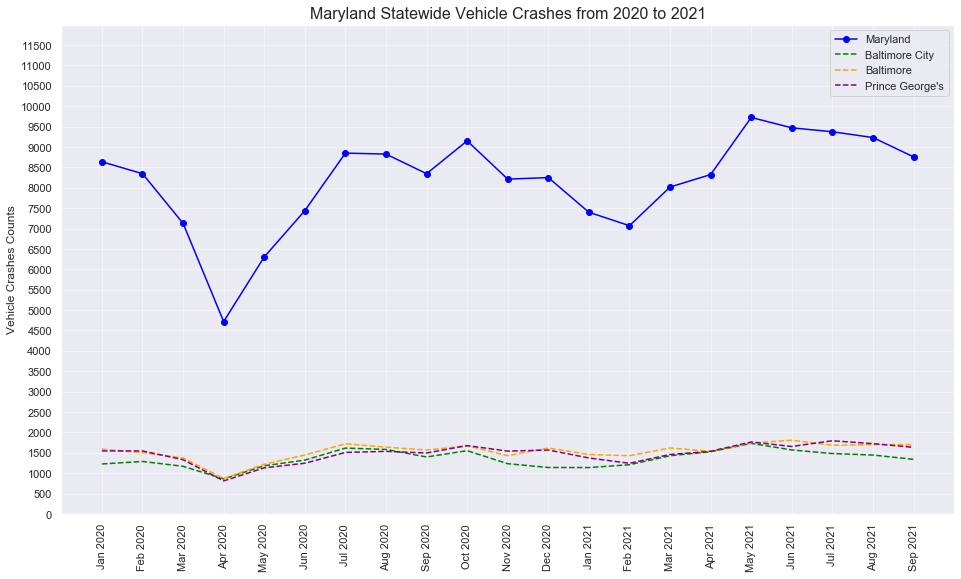

In [ ]:
# Visualize the accidents count by year month in a line group
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_ylim(0, 12000)
plt.title("Maryland Statewide Vehicle Crashes from 2020 to 2021", fontsize=16)
plt.ylabel('Vehicle Crashes Counts', fontsize=12)
xticklabels = ['Jan 2020','Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 
                          'Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021', 'Jul 2021', 'Aug 2021', 'Sep 2021']
plt.xticks(range(0, len(xticklabels)+1), labels=xticklabels, rotation='vertical')
plt.yticks(np.arange(0, 12000, 500))
plt.plot(crashes_by_year_month, color='blue', linestyle='-', marker='o', label='Maryland')
plt.plot(baltimore_city_crashes_by_year_month, color='green', linestyle='dashed', label='Baltimore City')
plt.plot(baltimore_crashes_by_year_month, color='orange', linestyle='dashed', label='Baltimore')
plt.plot(prince_georges_crashes_by_year_month, color='purple', linestyle='dashed', label='Prince George\'s')
ax.set_axisbelow(True)
ax.grid(which='major', linestyle='-', linewidth='0.5')
plt.legend()
plt.show()

In [ ]:
# Take out the outlier in April 2020, we wanted to see what is the true average number of crashes per month
(sum(crashes_by_year_month)-crashes_by_year_month['2020-04']) / (len(crashes_by_year_month)-1)

8342.9

From what we see from the line graph, there was a big dip of vehicle crashes in April 2020. This is largely due to the number of vehicles on the road was reduced in response to the national emergency of COVID-19 pandemic.  The former President declared Proclaimtion 9994 on March 13, 2020 declaring a National Emergency concerning the novel Coronavirus disease outbreak. This is a speculation of most federal employees and some workforces in the private sectors were offered to work remotely to slow down the spread of Coronavirus, that could be a contributing factor of the drop. In order for us to establish whether a strong correlation exists between traffic and crashes, traffic data is necessary to evaluate whether traffic patterns changes had contributed to the reduction of accidents around the time.  

In [ ]:
# Process the accident date using datetime object in pandas
merged_data['accident_date'] = pd.to_datetime(merged_data['ACC_DATE'].astype(str), format = '%Y-%m-%d')
merged_data['accident_date']

0        2020-08-26
1        2020-08-26
2        2020-08-26
3        2020-08-26
4        2020-08-26
            ...    
754287   2021-07-19
754288   2021-08-02
754289   2021-08-02
754290   2021-08-04
754291   2021-08-27
Name: accident_date, Length: 754284, dtype: datetime64[ns]

In [ ]:
# Create the full datetime object that includes both date and time of each accident
merged_data['accident_datetime'] = pd.to_datetime(merged_data.accident_date.astype(str) + ' ' +
                                                  merged_data.ACC_TIME.astype(str), format = '%Y-%m-%d %H:%M:%S')
merged_data['accident_datetime']

0        2020-08-26 07:25:00
1        2020-08-26 07:25:00
2        2020-08-26 07:25:00
3        2020-08-26 07:25:00
4        2020-08-26 07:25:00
                 ...        
754287   2021-07-19 17:32:00
754288   2021-08-02 22:04:00
754289   2021-08-02 22:04:00
754290   2021-08-04 16:02:00
754291   2021-08-27 03:45:00
Name: accident_datetime, Length: 754284, dtype: datetime64[ns]

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and

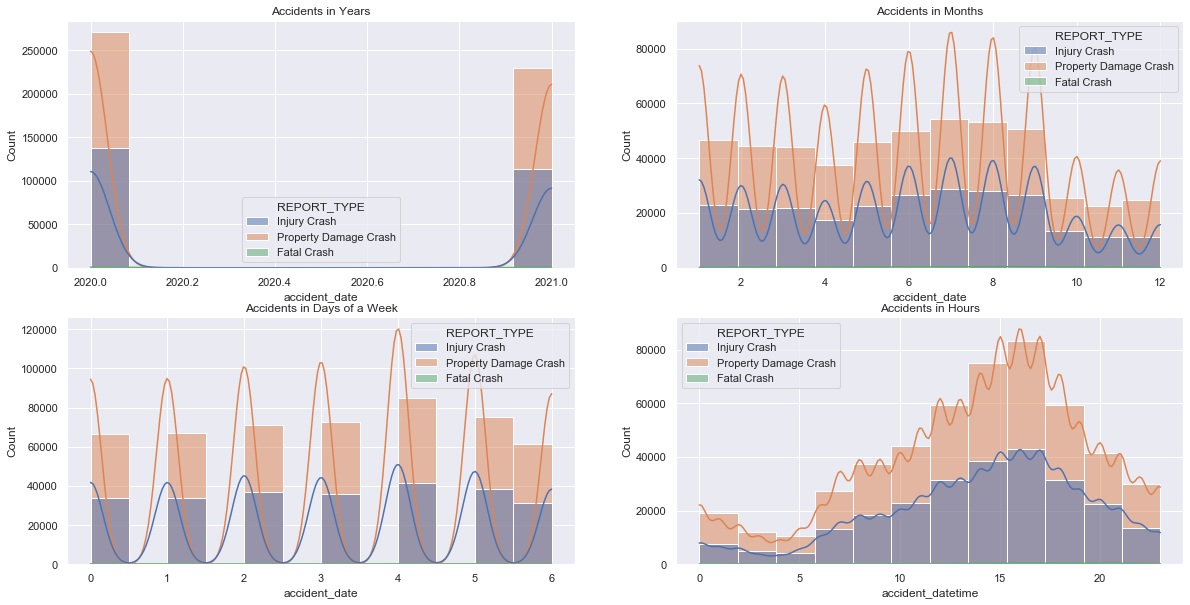

In [ ]:
sns.set(style='darkgrid')

fig, axs = plt.subplots(2,2, figsize = (20,10)) 

sns.histplot(data = merged_data, x = merged_data.accident_date.dt.year, bins = 12, 
             hue = merged_data.REPORT_TYPE, kde = True, color = 'skyblue', ax = axs[0,0]).set(title = 'Accidents in Years')


sns.histplot(data = merged_data, x = merged_data.accident_date.dt.month, bins = 12,
             hue = merged_data.REPORT_TYPE, kde = True, color = 'olive', ax = axs[0,1]).set(title = 'Accidents in Months')

sns.histplot(data = merged_data, x = merged_data.accident_date.dt.weekday, bins = 12,
            hue = merged_data.REPORT_TYPE, kde = True, color = 'gold', ax = axs[1,0]).set(title = 'Accidents in Days of a Week')

sns.histplot(data = merged_data, x = merged_data.accident_datetime.dt.hour, bins = 12,
             hue = merged_data.REPORT_TYPE, kde = True, color = 'teal',ax = axs[1,1]).set(title = 'Accidents in Hours')



plt.show()

From the plots above, we can find these insights below:

1. Property Damage Crash is the most common report type among all accidents in 2020-2021.
2. Most accidents happened in summer (July, August, September), while much less accidents happened in winter (October, November, December).
3. Insteresting still, Thursday turns out having the greatest number of accidents.
4. Most accidents happened between 4pm-5pm, which matches the common off-work time.